Question 7 -

Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [1]:
import requests
import json
from datetime import datetime
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Sending a GET request to the NASA API endpoint
url = "https://data.nasa.gov/resource/y77d-th95.json"
response = requests.get(url)

In [3]:
data = response.json()

In [4]:
# Read the dataset
df = pd.read_json('https://data.nasa.gov/resource/y77d-th95.json')


In [5]:
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,230.0,Fell,1934-01-01T00:00:00.000,13.63333,79.41667,"{'type': 'Point', 'coordinates': [79.41667, 13...",NaN,NaN
996,Tissint,54823,Valid,Martian (shergottite),7000.0,Fell,2011-01-01T00:00:00.000,29.48195,-7.61123,"{'type': 'Point', 'coordinates': [-7.61123, 29...",NaN,NaN
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01T00:00:00.000,-7.08333,111.53333,"{'type': 'Point', 'coordinates': [111.53333, -...",NaN,NaN
998,Tjerebon,24012,Valid,L5,16500.0,Fell,1922-01-01T00:00:00.000,-6.66667,106.58333,"{'type': 'Point', 'coordinates': [106.58333, -...",NaN,NaN


## DATA VISUALIZATION

In [6]:
df = df[df['year'].notna()]
df['year'] = pd.to_datetime(df['year'], errors='coerce')

# Remove rows with out-of-range datetime values
df = df[df['year'].notnull()]

# Group by year and calculate the count
meteorites_by_year = df['year'].dt.year.value_counts().sort_index()


C:\Users\DELL\AppData\Local\Temp\ipykernel_8928\258724405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_datetime(df['year'], errors='coerce')


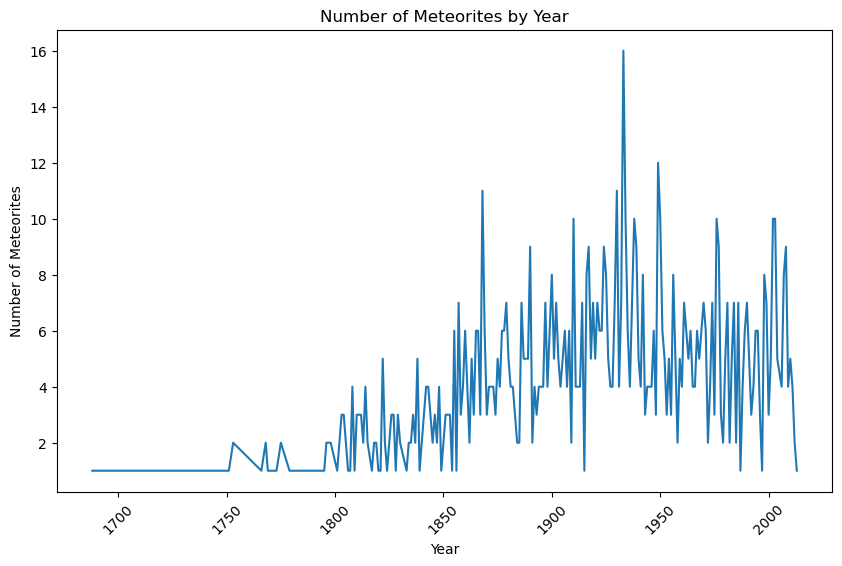

In [7]:

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(meteorites_by_year.index, meteorites_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Meteorites')
plt.title('Number of Meteorites by Year')
plt.xticks(rotation=45)
plt.show()


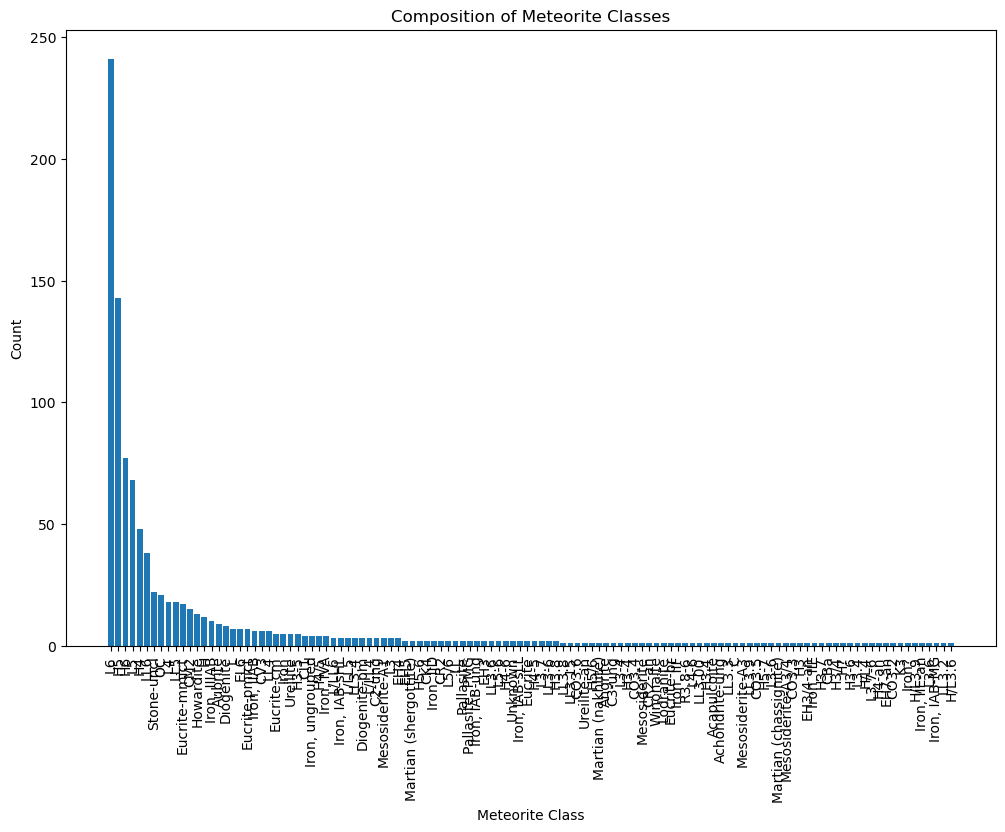

In [8]:
plt.figure(figsize=(12, 8))
class_counts = df['recclass'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Meteorite Class')
plt.ylabel('Count')
plt.title('Composition of Meteorite Classes')
plt.xticks(rotation=90)
plt.show()


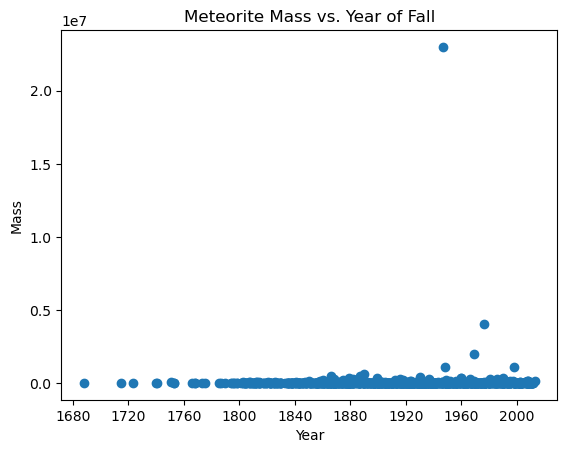

In [9]:
plt.scatter(df['year'], df['mass'])
plt.xlabel('Year')
plt.ylabel('Mass')
plt.title('Meteorite Mass vs. Year of Fall')
plt.show()

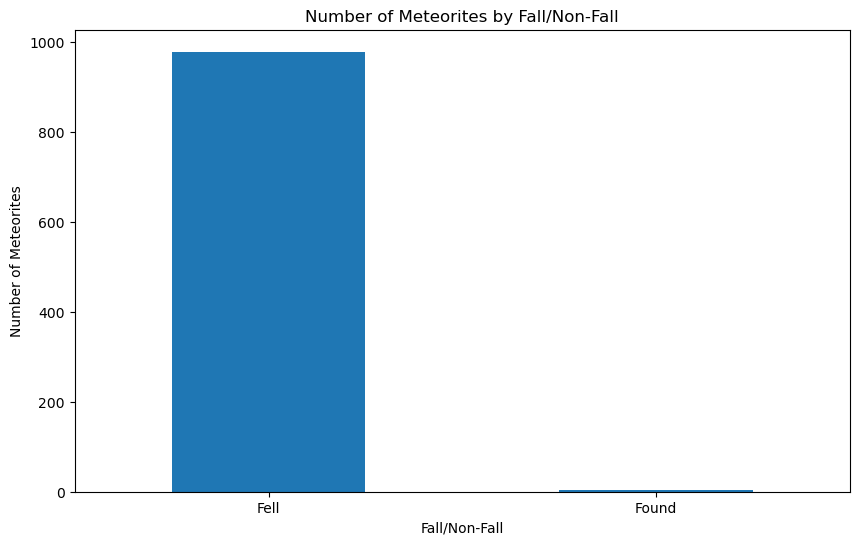

In [10]:
fall_counts = df['fall'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
fall_counts.plot(kind='bar')
plt.xlabel('Fall/Non-Fall')
plt.ylabel('Number of Meteorites')
plt.title('Number of Meteorites by Fall/Non-Fall')
plt.xticks(rotation=0)
plt.show()

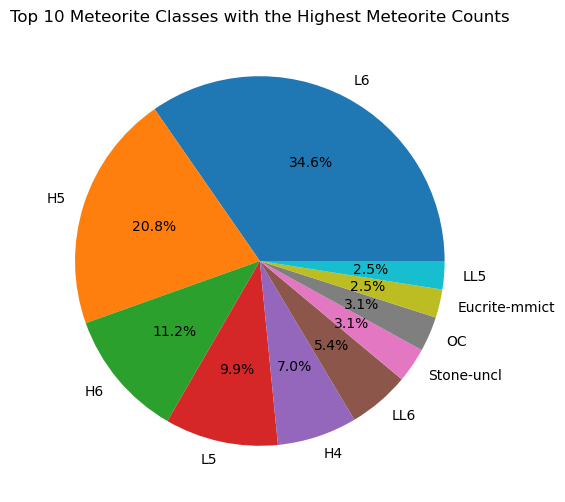

In [11]:
class_counts = df['reclong'].groupby(df['recclass']).count().sort_values(ascending=False)

# Select the top 10 classes
top = class_counts.head(10)

# Create a pie chart of the top 10 classes
plt.figure(figsize=(10, 6))
plt.pie(top, labels=top.index, autopct='%1.1f%%')
plt.title('Top 10 Meteorite Classes with the Highest Meteorite Counts')
plt.show()


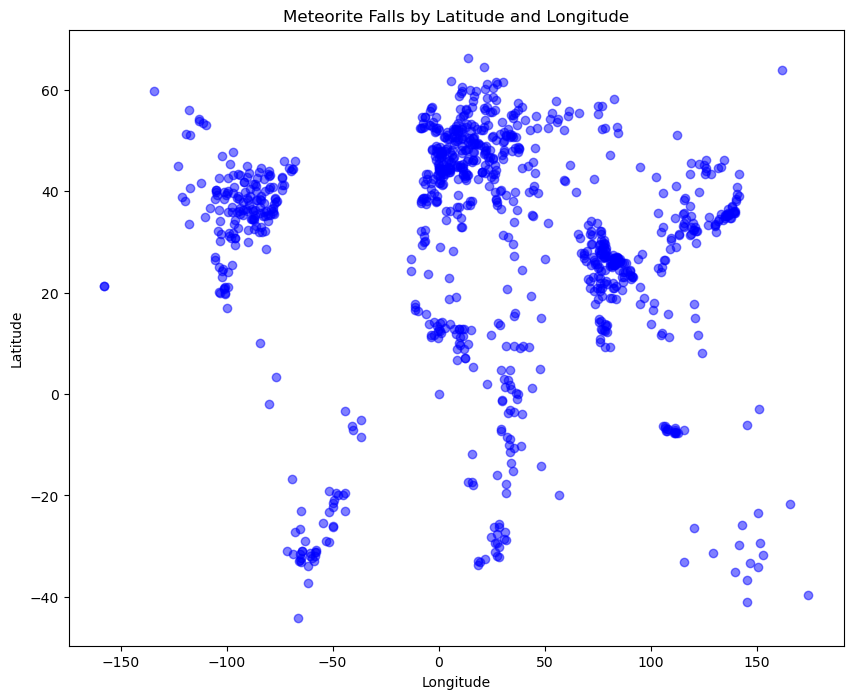

In [12]:
data = df[(df['reclat'].notna()) & (df['reclong'].notna())]

# Create a scatter plot of meteorite falls by latitude and longitude
plt.figure(figsize=(10, 8))
plt.scatter(data['reclong'], data['reclat'], c='blue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Meteorite Falls by Latitude and Longitude')
plt.show()


### Earth meteorites that fell before the year 2000


In [13]:
df['year'] = pd.to_datetime(df['year'], format='%Y-%m-%dT%H:%M:%S.%f')

# Filter out Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = df[(df['year'].dt.year < 2000)]

# Print the results
earth_meteorites_before_2000.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN


### Earth meteorites coordinates that fell before the year 1970 


In [14]:
earth_meteorites_before_1970 = df[(df['year'].dt.year < 1970) & (df['reclat'].notna()) & (df['reclong'].notna())]

# Extracting the coordinates
coordinates = earth_meteorites_before_1970[['reclat', 'reclong']]

# Printing the results
print(coordinates)

       reclat    reclong
0    50.77500    6.08333
1    56.18333   10.23333
2    54.21667 -113.00000
4   -33.16667  -64.95000
5    32.10000   71.80000
..        ...        ...
994  54.50000   35.20000
995  13.63333   79.41667
997  -7.08333  111.53333
998  -6.66667  106.58333
999  47.85000   34.76667

[757 rows x 2 columns]


### Earth meteorites with mass greater than 10000 kg


In [15]:
earth_meteorites_greater_than_10000kg = df[(df['mass'].astype(float) > 10000)]

# Printing the results
earth_meteorites_greater_than_10000kg.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
7,Agen,392,Valid,H5,30000.0,Fell,1814-01-01,44.21667,0.61667,"{'type': 'Point', 'coordinates': [0.61667, 44....",NaN,NaN
11,Aïr,424,Valid,L6,24000.0,Fell,1925-01-01,19.08333,8.38333,"{'type': 'Point', 'coordinates': [8.38333, 19....",NaN,NaN
16,Akyumak,433,Valid,"Iron, IVA",50000.0,Fell,1981-01-01,39.91667,42.81667,"{'type': 'Point', 'coordinates': [42.81667, 39...",NaN,NaN
27,Alfianello,466,Valid,L6,228000.0,Fell,1883-01-01,45.26667,10.15000,"{'type': 'Point', 'coordinates': [10.15, 45.26...",NaN,NaN
